# Tutorial: Data Science on Song Data

This tutorial will introduce you to the basic methods in gathering, processing, and interpreting datasets of songs.

## Introduction

In this tutorial, we will explore some basic methods processing music data, specifically using characteristics of individual songs. Each song can be spectrally broken down, and viewed in several categories: Beats per minute (BPM), Energy, Dance, Loudness, Valence (Note: we will not do spectral analysis in this tutorial). Often, we want to know more about our musical preferences, while finding new music. In order to do this, we can analyze the components of songs in relation to the other songs in a dataset and try to utilize patterns in the spatial data. This can be done a number of ways. We will explore the fundamentals for manipulating music data in more ways than this tutorial could feasibly cover.

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

## Installing Necessary Libraries

Before we begin, check your machine for Pip, and install online if needed. 

Now, we can get started installing relevant libraries. To install, You will need the following libraries:

    - csv
    - pandas
    - math
    - matplotlib
    - numpy
    - mpl_toolkits
    - sklearn.linear_model
    
    
These libraries come with many Python environments. If you are lacking any of theabove libraries, try to install each individually, or install Anaconda python environment (recommended option). To install ananconda, run the following command:
       
    $:>> pip install anaconda
    
Your machine may ask for root access. Say yes, and allow pip to install the needed libraries for Anaconda, including all the requisite libraries, as well as setting up an environment for us to use them.

Note: It is encouraged to use Python 3 when following this tutorial, as there may be some subtle discrepancies between the two versions.

In [1]:
import csv
import pandas as pd
import math
import matplotlib
import numpy as np
matplotlib.use("svg")
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
if not os.environ.get("DISABLE_TESTING", False):
    %matplotlib inline
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10, 8) #adjust to fit screen
from sklearn.linear_model import LinearRegression


# Collecting and Pre-processing Data from Internet

For the scope of this project, we will be working with a given excel spreadsheet of 1000 songs, and will not explore data scraping this information. 

Fortunately, this means we do not have to use the Spotify API, because Paul Lamere and Nick Sonneveld did most of the work for us! These two created http://sortyourmusic.playlistmachinery.com/, an application made using the Spotify API. The website is easy to use: login to a Spotify account, and select any pre-existing playlists.

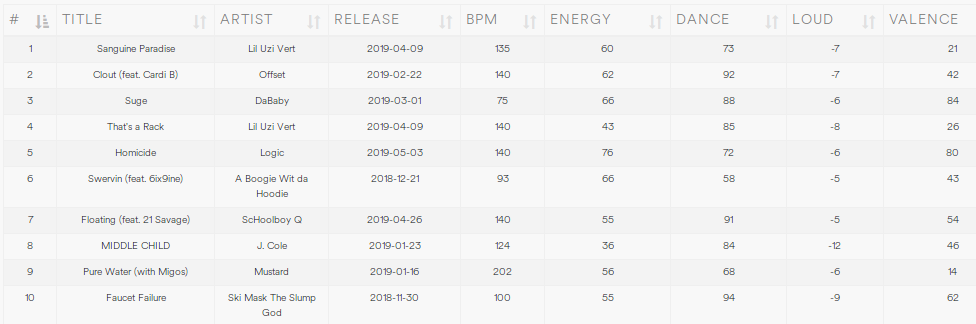

Briefly, let's consider how this information was taken from raw mp3 and other audio files on Spotify. Sortyourmusic.com can only exist as a result of the Spotify API. In order to use the Spotify API, each user needs a Client ID and Client Secret. Your Client ID is a special string of characters that helps the network identify who you are, and the Client Secret is what is needed to gain access to information within the API. Never share either your Client ID ot Client Secret! Even when posting your code, both credentials should always be redacted.

Using the information from this useful Spotify application, we have applied a normalization to the values across the dataset for each characteristic to hold the same initial weights. We can manipulate the weights and features of each song, but it is crucial for every value to be on the same scale. To do this, we apply the formula in the figure to the values in the dataset. This, importantly, removes statistical error in each category, as well as normalizes the magnitudes of each variable. This helps underlying characteristics of the data to be more observable.

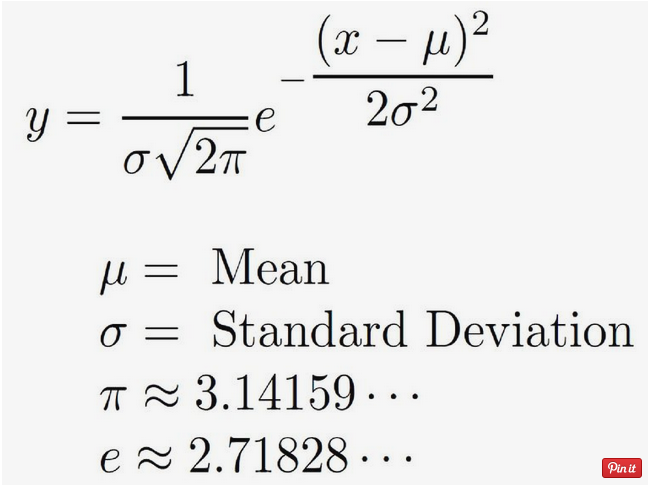

**Here is what our initial dataset looks like:**

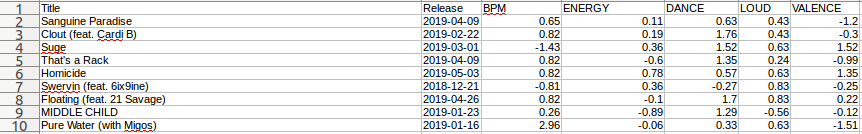

Look at the values of the table from before compared to this one. Notice all values are approximately between -1 and 1. Normalizing magnitude lets the values of each feature have more weight. This is crucial, because, later on, we will be adding weight to the features we value, and reducing the values of those we do not particularly care about. 

At last, we are ready to get into the fun!

##   Converting into Structured Data Format

Now that we have installed our libraries and loaded our libraries, let's start by converting our CSV file datatype into a more usable datatype, a dictionary. Working with CSV files is widely documented because of their varying uses. CSV files are great because they are easily converted into readable excel files, while also retaining enough structure to be useful in Python, as well as some of the libraries we have imported.

We will begin by storing all the data into a dictionary called and all song names in a list called keys. Our dictionary will use each song name as a unique identifier. Assume there are no duplicate entries in the given CSV.

In order to structure our data, we must first create our dictionary and dictionary key. To do this we then must read the CSV and convert each row, or song, into a format we can input into our dictionary and list. Then, we will return a tuple of the key and dictionary. A tuple is useful, and tidy, form to return two robust datatypes in one variable name. This will help us understand the code better as we go along.


In [2]:
## First, we need to create places to store our dictionary and list
## AND our Dataset! We need to read the CSV from a text file into a string.

songs = dict() #dictionary created

key = [] #list created

#The name of our CSV file is: 1000-songs-normalized.csv
#Storing our CSV won't be quite as simple. First, we will open the entire text file 
# and save it to a variable.

file = open("1000-songs-normalized.csv")
#make sure your csv is in the same folder as this notebook, or include the full path to its location

#now we can use csv.reader(), which returns a reader object, which will iterate over
# lines in the input csv file

reader = csv.reader(file)

#next, we assign each each row to a header using next(). csv.next() returns the next row of the csv
# as a list

headers = next(reader, None)
#None means we are not using a dialect to parse

#with headers, we will be able to iterate over the entire csv
#Regardless, we still have to iterate over each reader object using a for loop

for row in reader:
    #each row is all the information about one song
    name = row[0] #first cell contains the song's name
    #which we will be using as our key
    key.append(name)

    # we need to fill each song with all its data (we will remove unnecessary features later)
    # we can't just do songs[name] = row[2:] because the float values we stored in the csv
    # are now of type string!
    #uncomment line below to check
    
    #print(row[1]), print(type(row[1])),print(row[2]), print(type(row[2])); break
    
    songs[name] = list(map(float, row[2:]))
    #we start at 2 because we are not using release date as a metric in this tutorial.
    # map() is a nifty trick to convert many items in a list to the same data type
    # we took release dates out to simplify mapping the datatypes.
    


Look at that! We have now read the entire csv file into a dictionary. With little added effort, we successfully stored each song name into a list, too.

Let's put it all together!

In [3]:
def load_csv(csv_file = "1000-songs-normalized.csv"):
    #I have set a default csv_file to our dataset for cleaner coding further on.
    
    f =  open(csv_file)
    reader = csv.reader(f)
    headers = next(reader, None)
    songs = dict()
    key = []
    for row in reader:
        name = row[0]
        key.append(name)
        songs[name] = list(map(float, row[2:]))
        #uncomment line in loop for visualizing what each iteration adds to songs
        #print(name), print(row[2:]), print("|=|=|=|=|=|=|-iteration-seperator-|=|=|=|=|=|=|=|=|=|=|=|=|=|=")
        
    return (key, songs)

In [4]:
## uncomment lines below to help clarify what load_csv(csv_file) is doing
## Here is a helper code to give us insight into the new data we are working with.

def run_load_csv():
    test = load_csv()
    key = test[0]
    first_song_key = key[0]
    print("First Dict Entry is: %s" % first_song_key)
    print()
    songs = test[1]
    first_song_features = songs[first_song_key]
    print("First Dict Key returns values: ", end="")
    print(first_song_features)
    print()

    print("    Types:")
    print()
    print("test's type is: ", end=""), print(type(test))

    print("key's type is: ", end=""), print(type(key))
    
    print("songs's type is: ", end=""), print(type(songs))

    
## Uncomment  ONE at a time to visualize what load_csv is doing
#run_load_csv()
#print(songs)
#print(key)

With our filled dictionary and list neatly packed into a tuple, out function is ready to be called whenever we want. 

## Processing Features

Once we have our dict and key (a list) from load_csv(), we are prepared to begin learning about the trends in our data. To do this, we must slightly modify our characteristics by weighting and combing like features. This helps prevent over-fitting, and, as we will see, helps with visualization.

If this step seems redundant because of the pre-processing done to the data, let me explain. The pre-processing was to eliminate the statistical and magnitude errors in the data itself. Pre-processing itself is a vital step, because our results otherwise would inherently have limited generalization and/or insights.

On the other hand, we now have pulled out data of the csv, and are ready to begin manipulating the rata data from the Sortyourmusic API for our specialized purposes. 

This steps has some more subjective elements, and should be based on the opinions and preferences the user has for music. If unsure of your own preference for these very specific variables, then use the preset numbers or set them to 1/2 (Don't worry, these sections will be commented).

In [5]:
## Let's get going.

##First, we need to load our tuple and unpack it. You can index into a tuple just like a list

tup = load_csv()
keys = tup[0]
songs = tup[1]
new_dataset = [] #Using a list of lists here is not the only possible type to store this dataset,
                 #but it will help us, later

    
    
#To make our new dataset, we need to iterate through songs. For this, we can use keys (or songs)
#Here, using keys makes this more readable
for key in keys:
    #Each feature was stored in this order. Refer to initial dataset image above.
    beats_per_minute = songs[key][0]
    bpm = songs[key][0]
    energy = songs[key][1]
    dance = songs[key][2]
    loud = songs[key][3]
    valence = songs[key][4]
    
    #Now, for every song, we are going to combine like features,
    # while adding weights to more favored features.
    

    
    #Sometimes, too many features causes over fitting, and makes visualizing more difficult
    #We are going to give great weight to Beats-per-Minute because tempo is prominant feature to me
    feature_1 = beats_per_minute * 0.8
    
    #Energy refers to how music affects one's energy levels,
    #  and Valence refers to the mood of a song (such as happy or sad)
    feature_2 = energy * 0.6 + valence * 0.2
    
    #Dance and Loud refer to how much a song can be danced to and how loud a song is, respectively
    feature_3 = dance * 0.4 + loud * 0.4
    
    #all features carry an overall modifier of 0.8. It is more important that all magnitudes at this point
    #are the same for each feature
    
    #Now we will add the song name and its new features to a list, and add that list to new_dataset
    temp_list = []
    
    song_name = key
    feat1 = round(feature_1,4)
    feat2 = round(feature_2,4)
    feat3 = round(feature_3,4) #round each feature to the 3 decimal places
    temp_list.extend((song_name, feat1, feat2, feat3))
    
    new_dataset.append(temp_list) #now we have a list of lists
    
#uncomment the below line to see how the data is now formatted
#print(new_dataset[0]),print("\n|=|=|=|=|=|=|=|\n"),print(new_dataset[1])
#above line prints out first two lists in the list new_dataset

Now that we have gone through the steps to process our subjectively-weighted, raw data into equally three equally weighted features, Let's now create a function that takes in a tuple and returns a list of lists. To do this, we have to create a function with the same function as the code above.

In [6]:
#Here we are creating a new dict, where each key (song name)
# corresponds to 3 weighted features

## Takes in a tuple of key and dictionary
## and
## returns a list of lists of reshaped data, with 3 features

def reshape_data(tup):
    keys = tup[0]
    songs = tup[1]
    reshape = []
    for key in keys:
        bpm = songs[key][0]
        energy = songs[key][1]
        dance = songs[key][2]
        loud = songs[key][3]
        valence = songs[key][4]
        val1 = bpm*0.8
        val2 = (energy*0.6 + valence*0.2)
        val3 = (dance*.4 + loud*.4)
        temp = []
        temp.extend((key, 
                     round(val1,4), 
                     round(val2,4), 
                     round(val3,4)))
        reshape.append(temp)
    return reshape

**Now that our data is weighted** Let's take a look at what our data set is looking like. In order to do this, we are going to use the Pandas library we imported at the start. The Pandas library is a very useful library that converts a 2-d array, like our list of lists, into an Pandas DataFrame. With a Pandas DataFrame, our dataset now has attributes that allow us to easily access forms of our information that would otherwise be tedious. For example, you can retrieve all values for a certain feature name. We will see how next.

## Visualizing Data

Here we are, ready to visualize our nicely modified dataset. This can be done in many ways, but we are going to use the Pandas, Matplotlib, Mpl_toolkits libraries. These libraries all help us to manipulate our data so that we can view it in many different ways. Here, we are going to explore visualization in 3-dimensions.

In [7]:
##In order to plot our data, we need x, y, and z to be an object of some sort containing all X, Y, and Z
##in the dataset, while ensuring all share the same order. This is to say, index 5 of x,y,z all 
##return information about the same song.

#To do this, we will use a Pandas Dataframe.
#To convert a 2-d list into a pandas datatype you need one line of code
pd.DataFrame(new_dataset)

#but we never stored this new object!

pandas_data = pd.DataFrame(new_dataset, columns=['Name','Val1', 'Val2', 'Val3'])


#Let's create an easy to use function to do this for us!

def convert_to_pand(lst):
    data = pd.DataFrame(lst, columns=['Name', 'Val1', 'Val2', 'Val3'])
    return data


With our Pandas DataFrame ready to go, we can begin plotting our data in 3 Dimensional space. If using your own music library, you will be able to see the actual shape of you musical taste! In order to do this, we will need to retrieve x, y, and z from pandas_data.

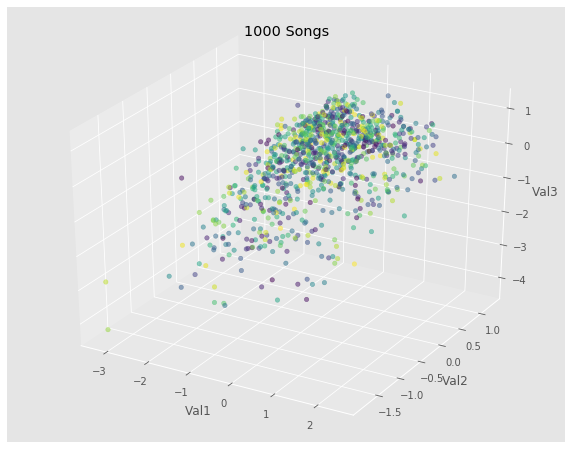

In [8]:
##Using the .loc method in Pandas, it takes a simples call to return a 
##Pandas Series of x, y and z, respectively

x = pandas_data.loc[:,'Val1']
y = pandas_data.loc[:,'Val2']
z = pandas_data.loc[:,'Val3']

#let's set our colors to our dataset size for better readability
colors = np.random.rand(1000)

#Initialize the graph
graph_body = plt.figure()

#change graph to a 3-d projection of data
axes = graph_body.add_subplot(111, projection='3d') #projection needs to be set,
                                                    #but position arg (111) is default

#Input data as a scatterplot
axes.scatter(x,y,z, c=colors, marker='o', alpha=0.5)  #marker is 'o' by default; set alpha to 1/2 
                                                      #for better visibility
    
#Now, we will set the Title and Label names for the graph
axes.set_title('1000 Songs')
axes.set_xlabel('Val1')
axes.set_ylabel('Val2')
axes.set_zlabel('Val3')
    
plt.show()


Wow! Look at all 1000 points displaced in space. Pretty Cool, huh? 

After having some fun, let's regain our focus. Can you implement what we just learned into a function? Below, you'll see just that. Plot_songs() takes in a reshaped


In [11]:
def plot_songs(data):
    x, y, z = data.loc[:,'Val1'], data.loc[:, 'Val2'], data.loc[:, 'Val3']
    colors = np.random.rand(1000)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d') 
    ax.scatter(x,y,z, c=colors, marker='o', alpha=0.5) 
    
    ax.set_title('1000 Songs')
    ax.set_xlabel('Val1')
    ax.set_ylabel('Val2')
    ax.set_zlabel('Val3')
    
    plt.show()

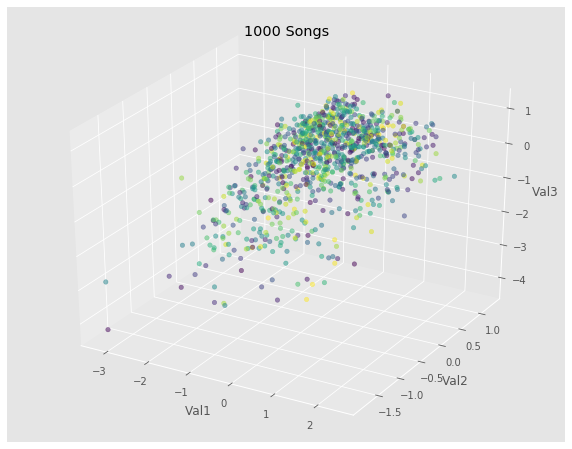

In [12]:
## Uncomment Below to run all that we have done in ONE line of code!!

plot_songs(convert_to_pand(reshape_data(load_csv())))


Excellent job! We have gone through the fundamentals. From converting a csv file of music data into a dictionary and key to plotting processed features on a 3-Dimensional plot, this tutorial has almost reached its end. We have one more section, where we will use all of our work to create an application to make our gathered (possibly) convey more insights. This portion is the most difficult the many approaches yield varying fits to the data.

To fit such a large dataset, we are going to use a Linear Regression Model to fit the data. To do this, we are going to use observed values for x and y to predict values for z

In [13]:
##Continuing from the plotted dataset, we will create another Pandas DataFrame representing
##the observed features (x and y)
observed = pd.DataFrame(data = {"x1" :x, "x2" : y})

#Here, this night Linear Regression function allows us to calculate a linear regression and returns
#a linear_model sklearn object. This can be used to graph on top of the dataset
fitted_line = LinearRegression().fit(var[["x1","x2"]],z)
print(type(fitted_line))


#Here we will plot the regression line only
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') 
ax.scatter(x,y,fitted_line.predict(var[["x1","x2"]]), c="red", marker='o', alpha=1)

plt.show()

NameError: name 'var' is not defined

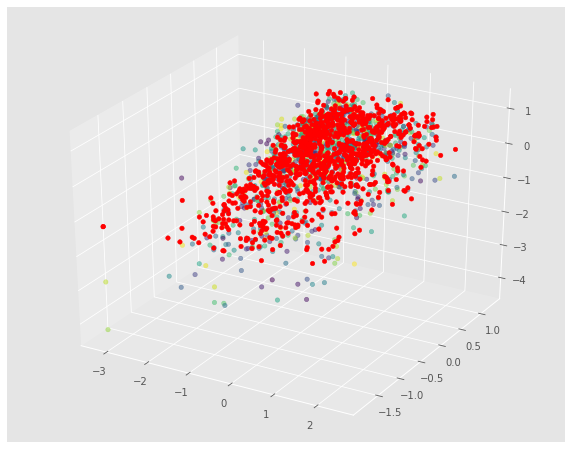

In [14]:
#Here we combine the plotting of both dataset and regression to see how they look with overlap

def plot_fitted_songs(data):
    x, y, z = data.loc[:,'Val1'], data.loc[:, 'Val2'], data.loc[:, 'Val3']
    var = pd.DataFrame(data = {"x1" :x, "x2" : y})
    fitted_line = LinearRegression().fit(var[["x1","x2"]],z)

    fig = plt.figure()
    axes = fig.add_subplot(111, projection='3d') 
    axes.scatter(x,y,z, c=colors, marker='o', alpha=0.5) 
    axes.scatter(x,y,fitted_line.predict(var[["x1","x2"]]), c="red", marker='o', alpha=1)

    plt.show()
    
    
plot_fitted_songs(convert_to_pand(reshape_data(load_csv())))

Now, we have done every aspect of analyzing song music data taken from a csv file. Now, you are ready to take the next steps and build on (and hopefully) improve the machine learning of your own music playlists. There are non-linear regression model, Support Vector Machines, as well as other methods to doing so. Whichever option you choose, the need to format, transform, and process music data will be integral.